<a href="https://colab.research.google.com/github/kunalpagarey/PyTocrh_Tutorial/blob/master/PyTorch_Linear_Regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

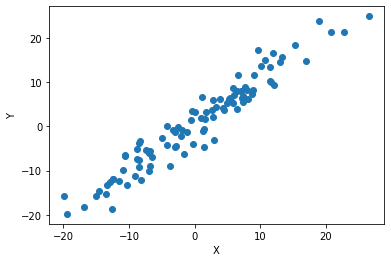

In [5]:
# Generate data.

X = torch.randn(100, 1)*10
Y = X + 3*torch.randn(100, 1)
plt.plot(X, Y, 'o')
plt.ylabel('Y')
plt.xlabel('X')

In [6]:
class LinReg(nn.Module):
  def __init__(self, in_feat, out_feat):
    super(LinReg, self).__init__()
    self.linear = nn.Linear(in_features=in_feat, out_features=out_feat)

  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LinReg(1, 1)
print(model)

LinReg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
W, B = model.parameters()
def get_params():
  return W[0][0].item(), B[0].item()

In [0]:
def plot_fig(title):
  x = np.array([-30, 30])
  w, b = get_params()
  y = w*x + b
  plt.title(title)
  plt.plot(x, y, 'r')
  plt.scatter(X, Y)
  plt.show()

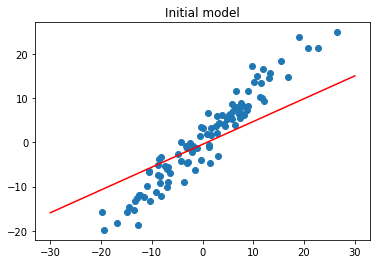

In [9]:
plot_fig("Initial model")

In [10]:
# Loss function and optimizer.

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 100
losses = []
for e in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, Y)
  losses.append(loss)
  print("Epoch: {}, Loss: {}".format(e, loss.item()))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 31.346242904663086
Epoch: 1, Loss: 23.763551712036133
Epoch: 2, Loss: 18.610061645507812
Epoch: 3, Loss: 15.1051025390625
Epoch: 4, Loss: 12.718997955322266
Epoch: 5, Loss: 11.092336654663086
Epoch: 6, Loss: 9.981253623962402
Epoch: 7, Loss: 9.220281600952148
Epoch: 8, Loss: 8.697135925292969
Epoch: 9, Loss: 8.335626602172852
Epoch: 10, Loss: 8.084044456481934
Epoch: 11, Loss: 7.907293796539307
Epoch: 12, Loss: 7.781555652618408
Epoch: 13, Loss: 7.690659999847412
Epoch: 14, Loss: 7.623622894287109
Epoch: 15, Loss: 7.572988510131836
Epoch: 16, Loss: 7.533685684204102
Epoch: 17, Loss: 7.502267360687256
Epoch: 18, Loss: 7.476384162902832
Epoch: 19, Loss: 7.454439640045166
Epoch: 20, Loss: 7.43533992767334
Epoch: 21, Loss: 7.418336391448975
Epoch: 22, Loss: 7.402914524078369
Epoch: 23, Loss: 7.388720512390137
Epoch: 24, Loss: 7.3755059242248535
Epoch: 25, Loss: 7.363096714019775
Epoch: 26, Loss: 7.351373672485352
Epoch: 27, Loss: 7.340243339538574
Epoch: 28, Loss: 7.3296403

Text(0, 0.5, 'Loss')

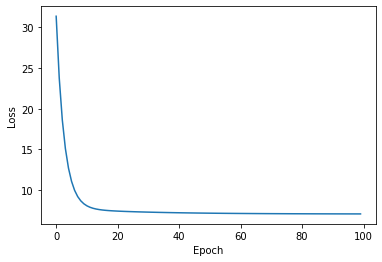

In [15]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

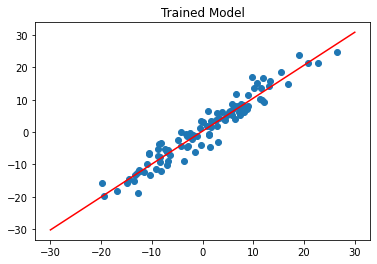

In [16]:
plot_fig("Trained Model")